# Introduction to pyAcceLEGOrator - bunch creation

22.10.2021

If you haven't cloned the repo, for the first time you need to run this cell. When it is already cloned, you can skip this cell.

In [1]:
!git clone https://github.com/potato18z/pam1-hs2021.git

Cloning into 'pam1-hs2021'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 49 (delta 18), reused 46 (delta 15), pack-reused 0
Unpacking objects: 100% (49/49), 782.19 KiB | 877.00 KiB/s, done.


The (rough) UML class diagram is given below:

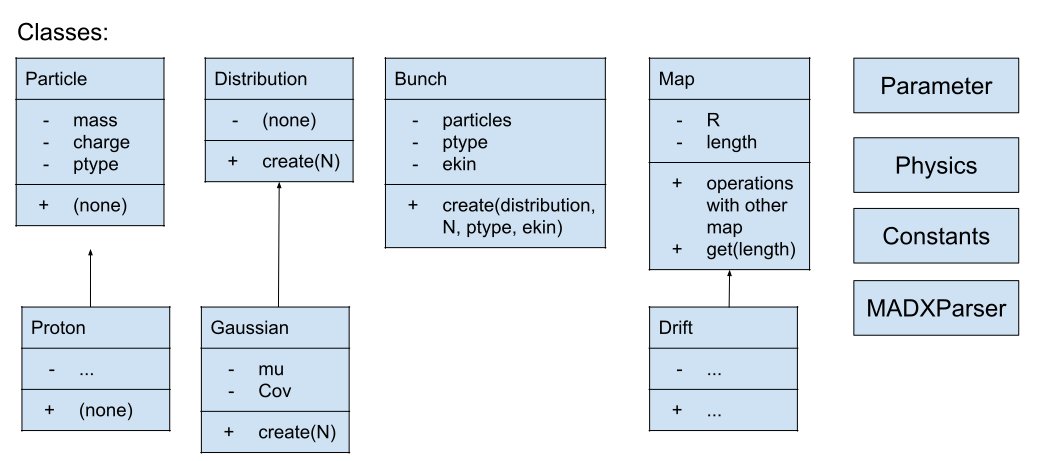

In [2]:
import sys
sys.path.append('./pam1-hs2021')
from IPython.core.display import SVG
SVG(filename='pam1-hs2021/img/uml.svg')

# Example: Bunch Creation

<html>
<div class="alert alert-info" role="alert" style="margin-top: 10px">
The goal of this example is to create a Gaussian bunch distribution of protons with given correlation and mean. Plot the different phase spaces $(x, px), (y, py)$ and $(z, pz)$. Play with the covariance matrix and the mean.
</div>
</html>

We are going to create a `Bunch` of protons with some kinetic energy whose 6-vectors follow a Gaussian distribution. Look at the `create` method of the `Bunch` class:
```python
def create(self, distribution, N, ptype, ekin):
        """Create N particles of ptype with energy ekin, following a distribution

        Parameters
        ----------
        distribution : Distribution
            a specific distribution, a class inherited from the Distribution class
        N : int
            The number of particles
        ptype : Particle
            a specific type of particle, a class inherited from the Particle class
        ekin : array of (N,)
            kinetic energy of all particles
        """

        self.particles = distribution.create(N)
        self.ptype = ptype
        self.ekin = ekin * np.ones((N,), dtype=np.float)
```
We need to define the following:
- a distribution of the `Distribution` class, here we use the `Gaussian` class inherited from `Distribution`
- a ptype of the `Particle` class, here we use the `Proton` class inherited from `Particle`

## Define Distribution

All distributions should be derived from the abstract base class ```Distribution```. Every child class needs to implement the function ```create(N)``` method where ```N``` specifies the number of particles.

For example, Gaussian is inherited from the Distribution class.
```python
class Gaussian(Distribution):
    ...

    def __init__(self, mu, C):
        """Define the distribution parameters

        Parameters
        ----------
        mu : array of (6,)
            mean of Gaussian distribution of the 6-vectors
        C : array of (6, 6)
            covariance matrix of Gaussian distribution of the 6-vectors
        """

        super(Gaussian, self).__init__()
        self.__mu = mu
        self.__cov = C


    def create(self, N):
        """Create N particles following the Gaussian distribution

        Parameters
        ----------
        N : int
            number of particles

        Returns
        -------
            an array of (6, N), 6-vectors of all particles
        """

        return np.random.multivariate_normal(self.__mu,
                                             self.__cov, N).T
 
        ...
```

A multivariate normal distribution takes two arguments. A mean $\mu\in\mathbb{R}^{6\times 1}$ specifying the centroid and a covariance matrix $C\in\mathbb{R}^{6\times 6}$ for the correlation and size. The state vector of a particle is defined by
$$\zeta =
\begin{pmatrix}
x & [mm] \\ px & [mrad] \\ y & [mm]\\ py & [mrad]\\ z & [mm]\\ pz & [{}^\text{o}\mkern-1mu/\mkern-1mu_\text{oo}]
\end{pmatrix}$$
and we are going to create an array of (6, N) following the multivariate Gaussian distribution.

Now we are ready to create a distribution. Generate a distribution of 1000 particles with
$$\mu = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{pmatrix}$$

and covariance matrix

$$C =
\begin{pmatrix}
16 & 0 & 0  & 0 & 0     & 0 \\
0  & 1 & 0  & 0 & 0     & 0 \\
0  & 0 & 16 & 0 & 0     & 0 \\
0  & 0 & 0  & 1 & 0     & 0 \\
0  & 0 & 0  & 0 & 0.709 & 0.0 \\
0  & 0 & 0  & 0 & 0     & 0.0981
\end{pmatrix}.
$$

In [3]:
from AcceLEGOrator import Gaussian
import numpy as np

# mean
mu = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# covariance matrix
C = np.array([[ 16.0, 0.0,  0,  0,  0, 0],
              [ 0.0, 1.0,  0,  0,  0, 0],
              [ 0,  0, 16.0,  0.0,  0, 0],
              [ 0,  0, 0.0, 1,  0, 0],
              [ 0,  0,  0,  0, 0.709, 0.0],
              [ 0,  0,  0,  0,  0.0, 0.0981]])

# instantiate distribution object
D = Gaussian(mu, C)
# print the distribution information (the __str__ method)
print(D)

***************************************************
Distribution information:
         Gaussian Distribution
         Parameter:
             * mean:		[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
             * covariance:	[[16.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 16.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.709, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0981]]
***************************************************


## Define Particle

As a last step before creating a beam, we need to define its particle species. We simply need the particle mass and charge. Our `Proton` class inherits from the basic `Particle` class.

```Python
class Particle(object):
    """The base class of all particles

    Attributes
    ----------
    mass : float
        particle mass in MeV /c^2
    charge : float
        particle charge in e
    pname : str
        a string specifying particle type

    Methods
    -------
    __str__()
        construct a formatted string of particle information
    """

    def __init__(self, mass, charge, pname):
        self.mass = mass        # MeV / c^2
        self.charge = charge    # e
        self.pname = pname      # string specifying type

    def __str__(self):
        ...

class Proton(Particle):

    def __init__(self):
        super(Proton, self).__init__(Constants.pmass,
                                     1.0,
                                     'Proton')
```
In ```Constants.py``` we  have some useful constants defined, i.e.

```Python
class Constants:
    clight     = codata.value('speed of light in vacuum')                   # m / s
    echarge    = codata.value('elementary charge')                          # C
    pmass      = codata.value('proton mass energy equivalent in MeV')       # MeV / c^2
    emass      = codata.value('electron mass energy equivalent in MeV')     # MeV / c^2
```
etc.

Now we define our particle instance.

In [4]:
from AcceLEGOrator import Proton

# instantiate Proton particle
particle = Proton()

Now you are ready to create a beam. In order to create a bunch call the member function of ```Bunch```. Note that in the definition of `Bunch`, we have
```python
class Bunch(object):
    """
    A class that specifies a bunch of particles
    Ordering of the state vector: (x, px, z, py, z, pz)

    Attributes
    ----------
    __dict : dict
        the mapping of coordinates to indices
    particles : array of (6, N)
        the 6-vectors of N particles
    ptype : Particle
        a specific type of particle, an instance inherited from the Particle class
    ekin : array of (N,)
        kinetic energy of all particles
```
where `ptype` is of the class `Particle`, and `ptype.pname` is the string of the particle type, i.e.
```python
bunch.ptype = Proton()
bunch.ptype.pname = 'Proton'
```

And now we use the `Bunch.create` method to create a bunch. We use $E_{kin}=230 MeV$ and $N=1000$ particles.
```Python
def create(self, distribution, N, ptype, ekin):
        """Create N particles of ptype with energy ekin, following a distribution

        Parameters
        ----------
        distribution : Distribution
            a specific distribution, a class inherited from the Distribution class
        N : int
            The number of particles
        ptype : Particle
            a specific type of particle, a class inherited from the Particle class
        ekin : array of (N,)
            kinetic energy of all particles
        """
        ...
```

In [5]:
from AcceLEGOrator import Constants, Bunch

# kinetic energy [MeV]
ekin = 230

# instantiate bunch
bunch = Bunch()

bunch.create(distribution = D, N = 1000,
             ptype = particle, ekin = ekin)

We can also print out information of the bunch.

In [6]:
print(bunch)

***************************************************
Bunch information:
         #particles:		1000
          particle type:		Proton
***************************************************


## Plot phase space

Finally, plot the different phase spaces, i.e. $(x, p_x)$, $(y, p_y)$ and $(z, p_z)$. In order to obtain all values of for example phase space variable ```x```, one can simply call
```Python
x = bunch['x']
```
all other variables are obtained accordingly. First, write a function that does a scatter plot.

In [7]:
from matplotlib import pyplot as plt

# param ax is the axis to plot on
# param xvar phase space variable in x-dir
# param yvar phase space variable in y-dir
# param xlab label for x-axis
# param ylab label for y-axis
def plot_phase_space(ax, xvar, yvar, xlab, ylab):
    vmin = min(min(xvar), min(yvar))
    vmin += 0.1 * vmin
    vmax = max(max(xvar), max(yvar))
    vmax += 0.1 * vmax
    
    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.scatter(xvar, yvar, s=1)

Use above method to do your plots.

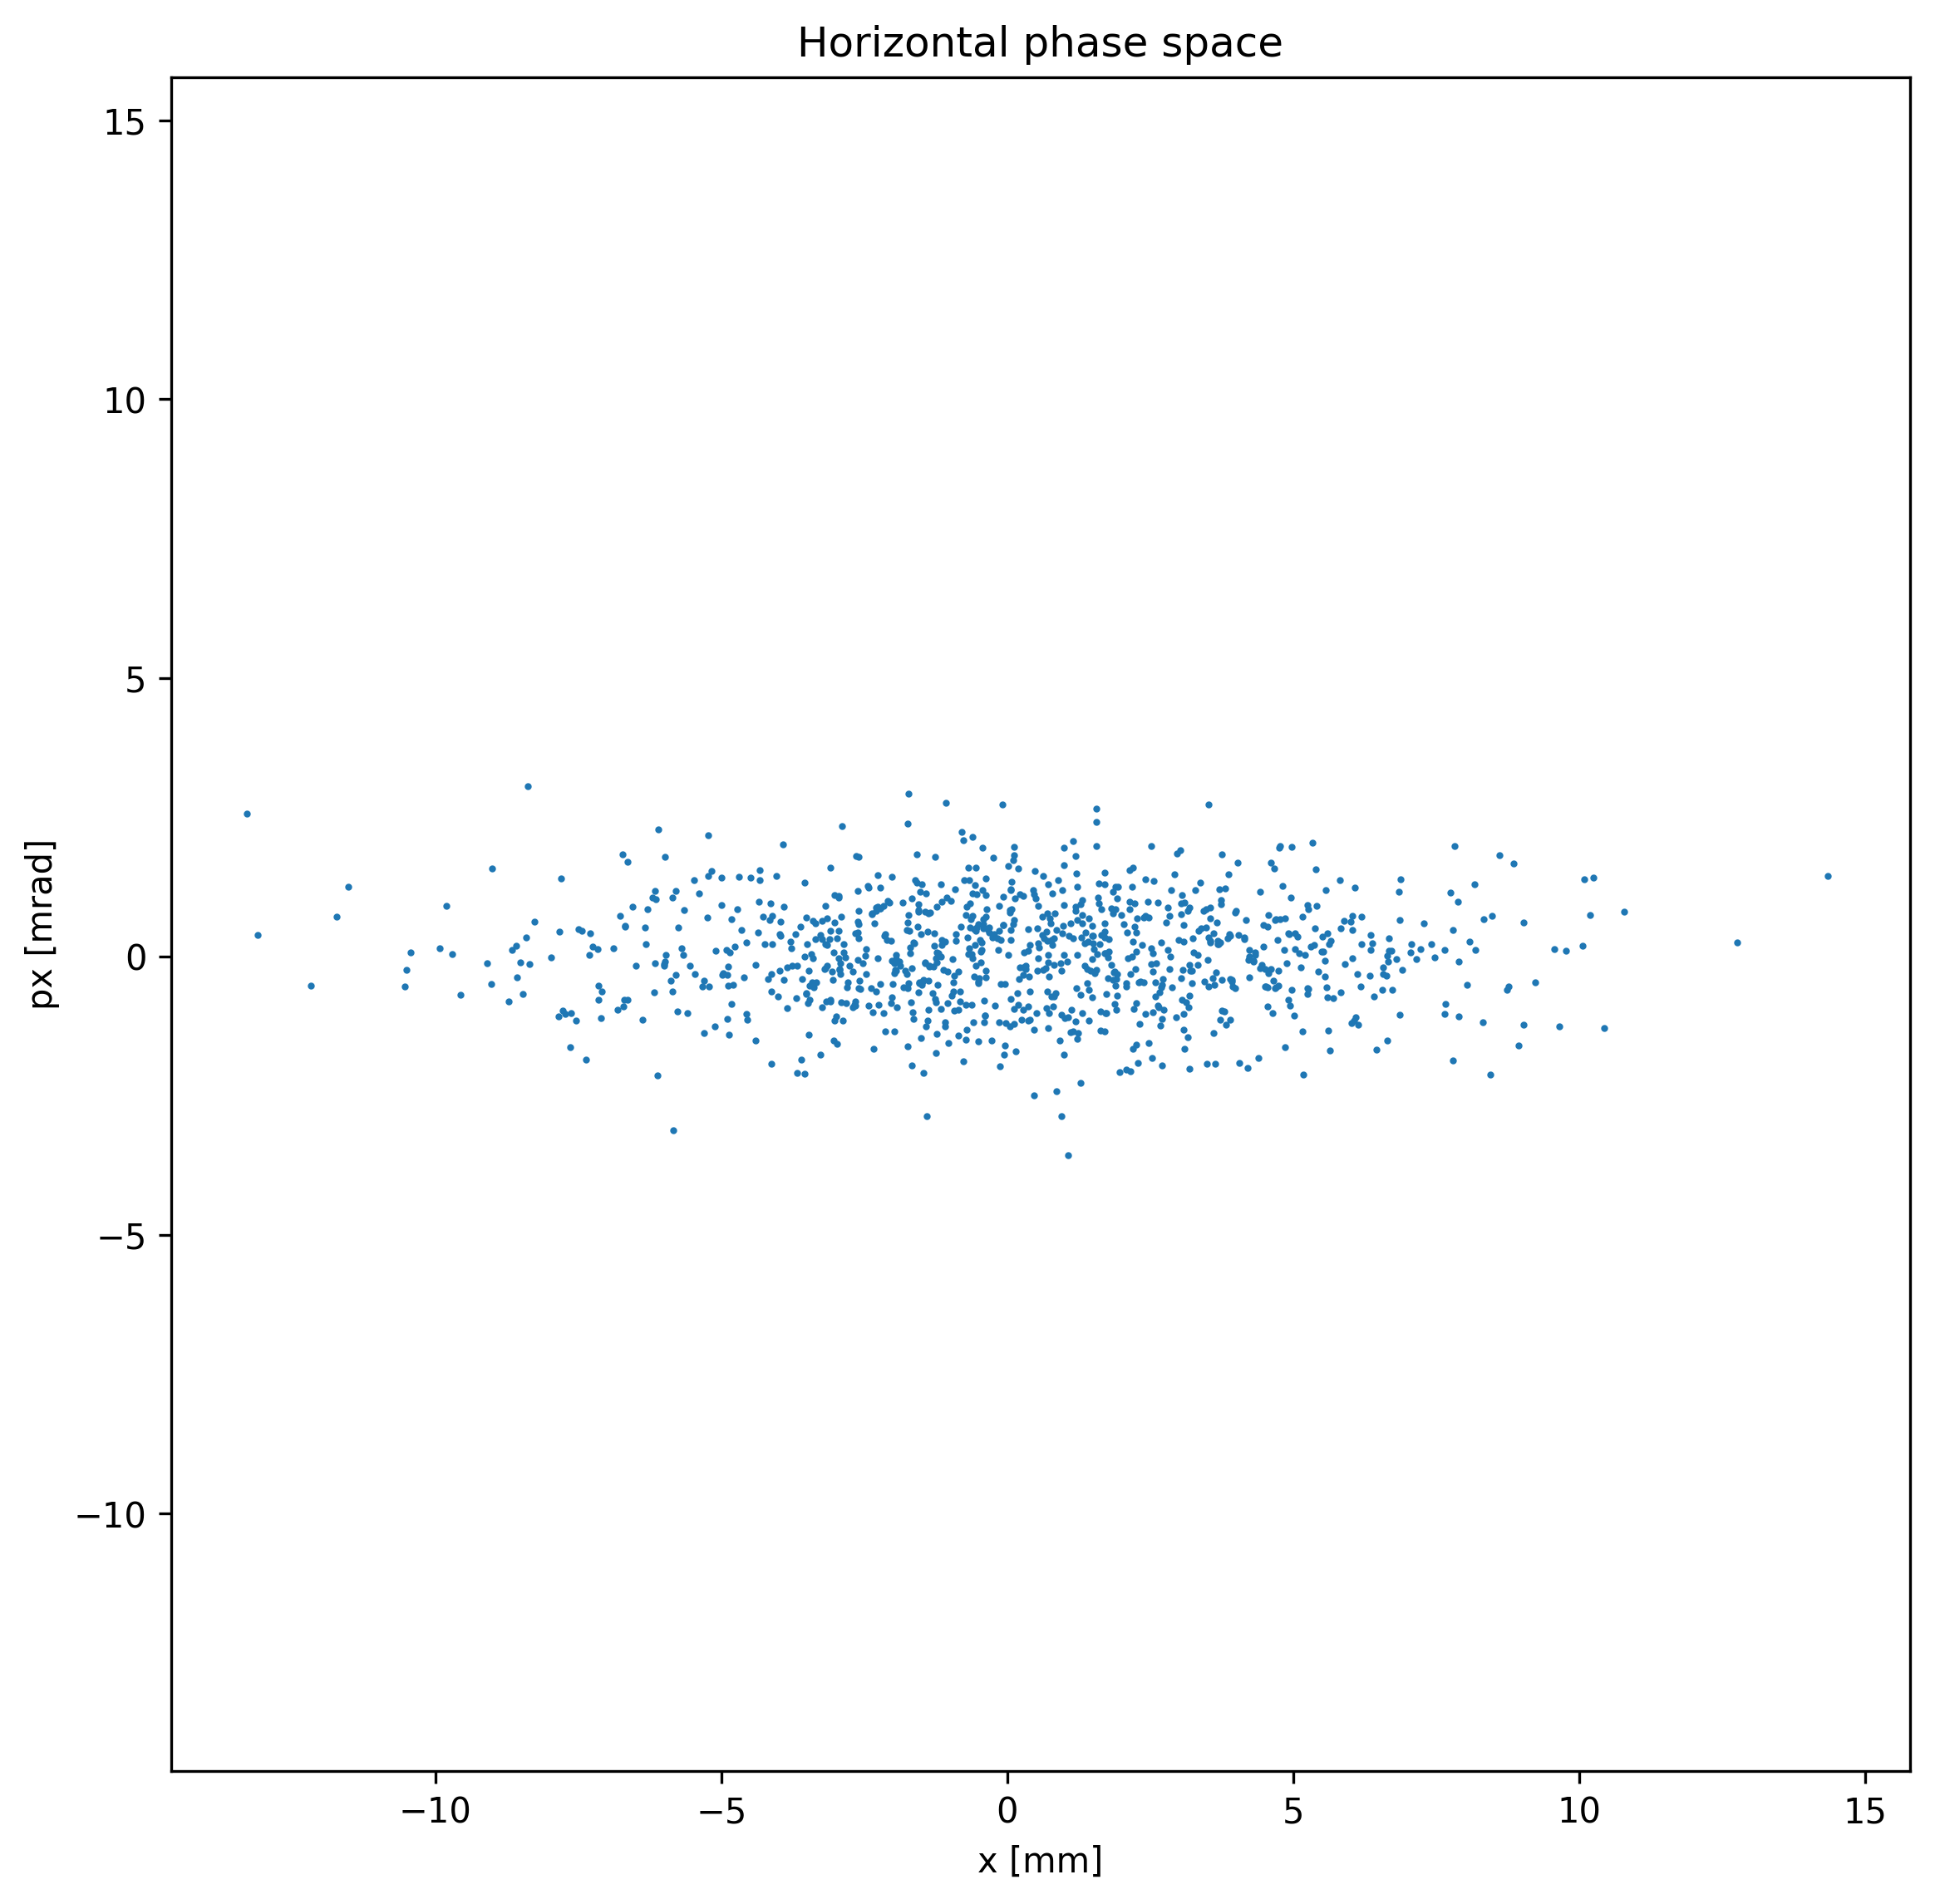

In [8]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Horizontal phase space')

plot_phase_space(ax, bunch['x'], bunch["px"], "x [mm]", "px [mrad]")
plt.show()

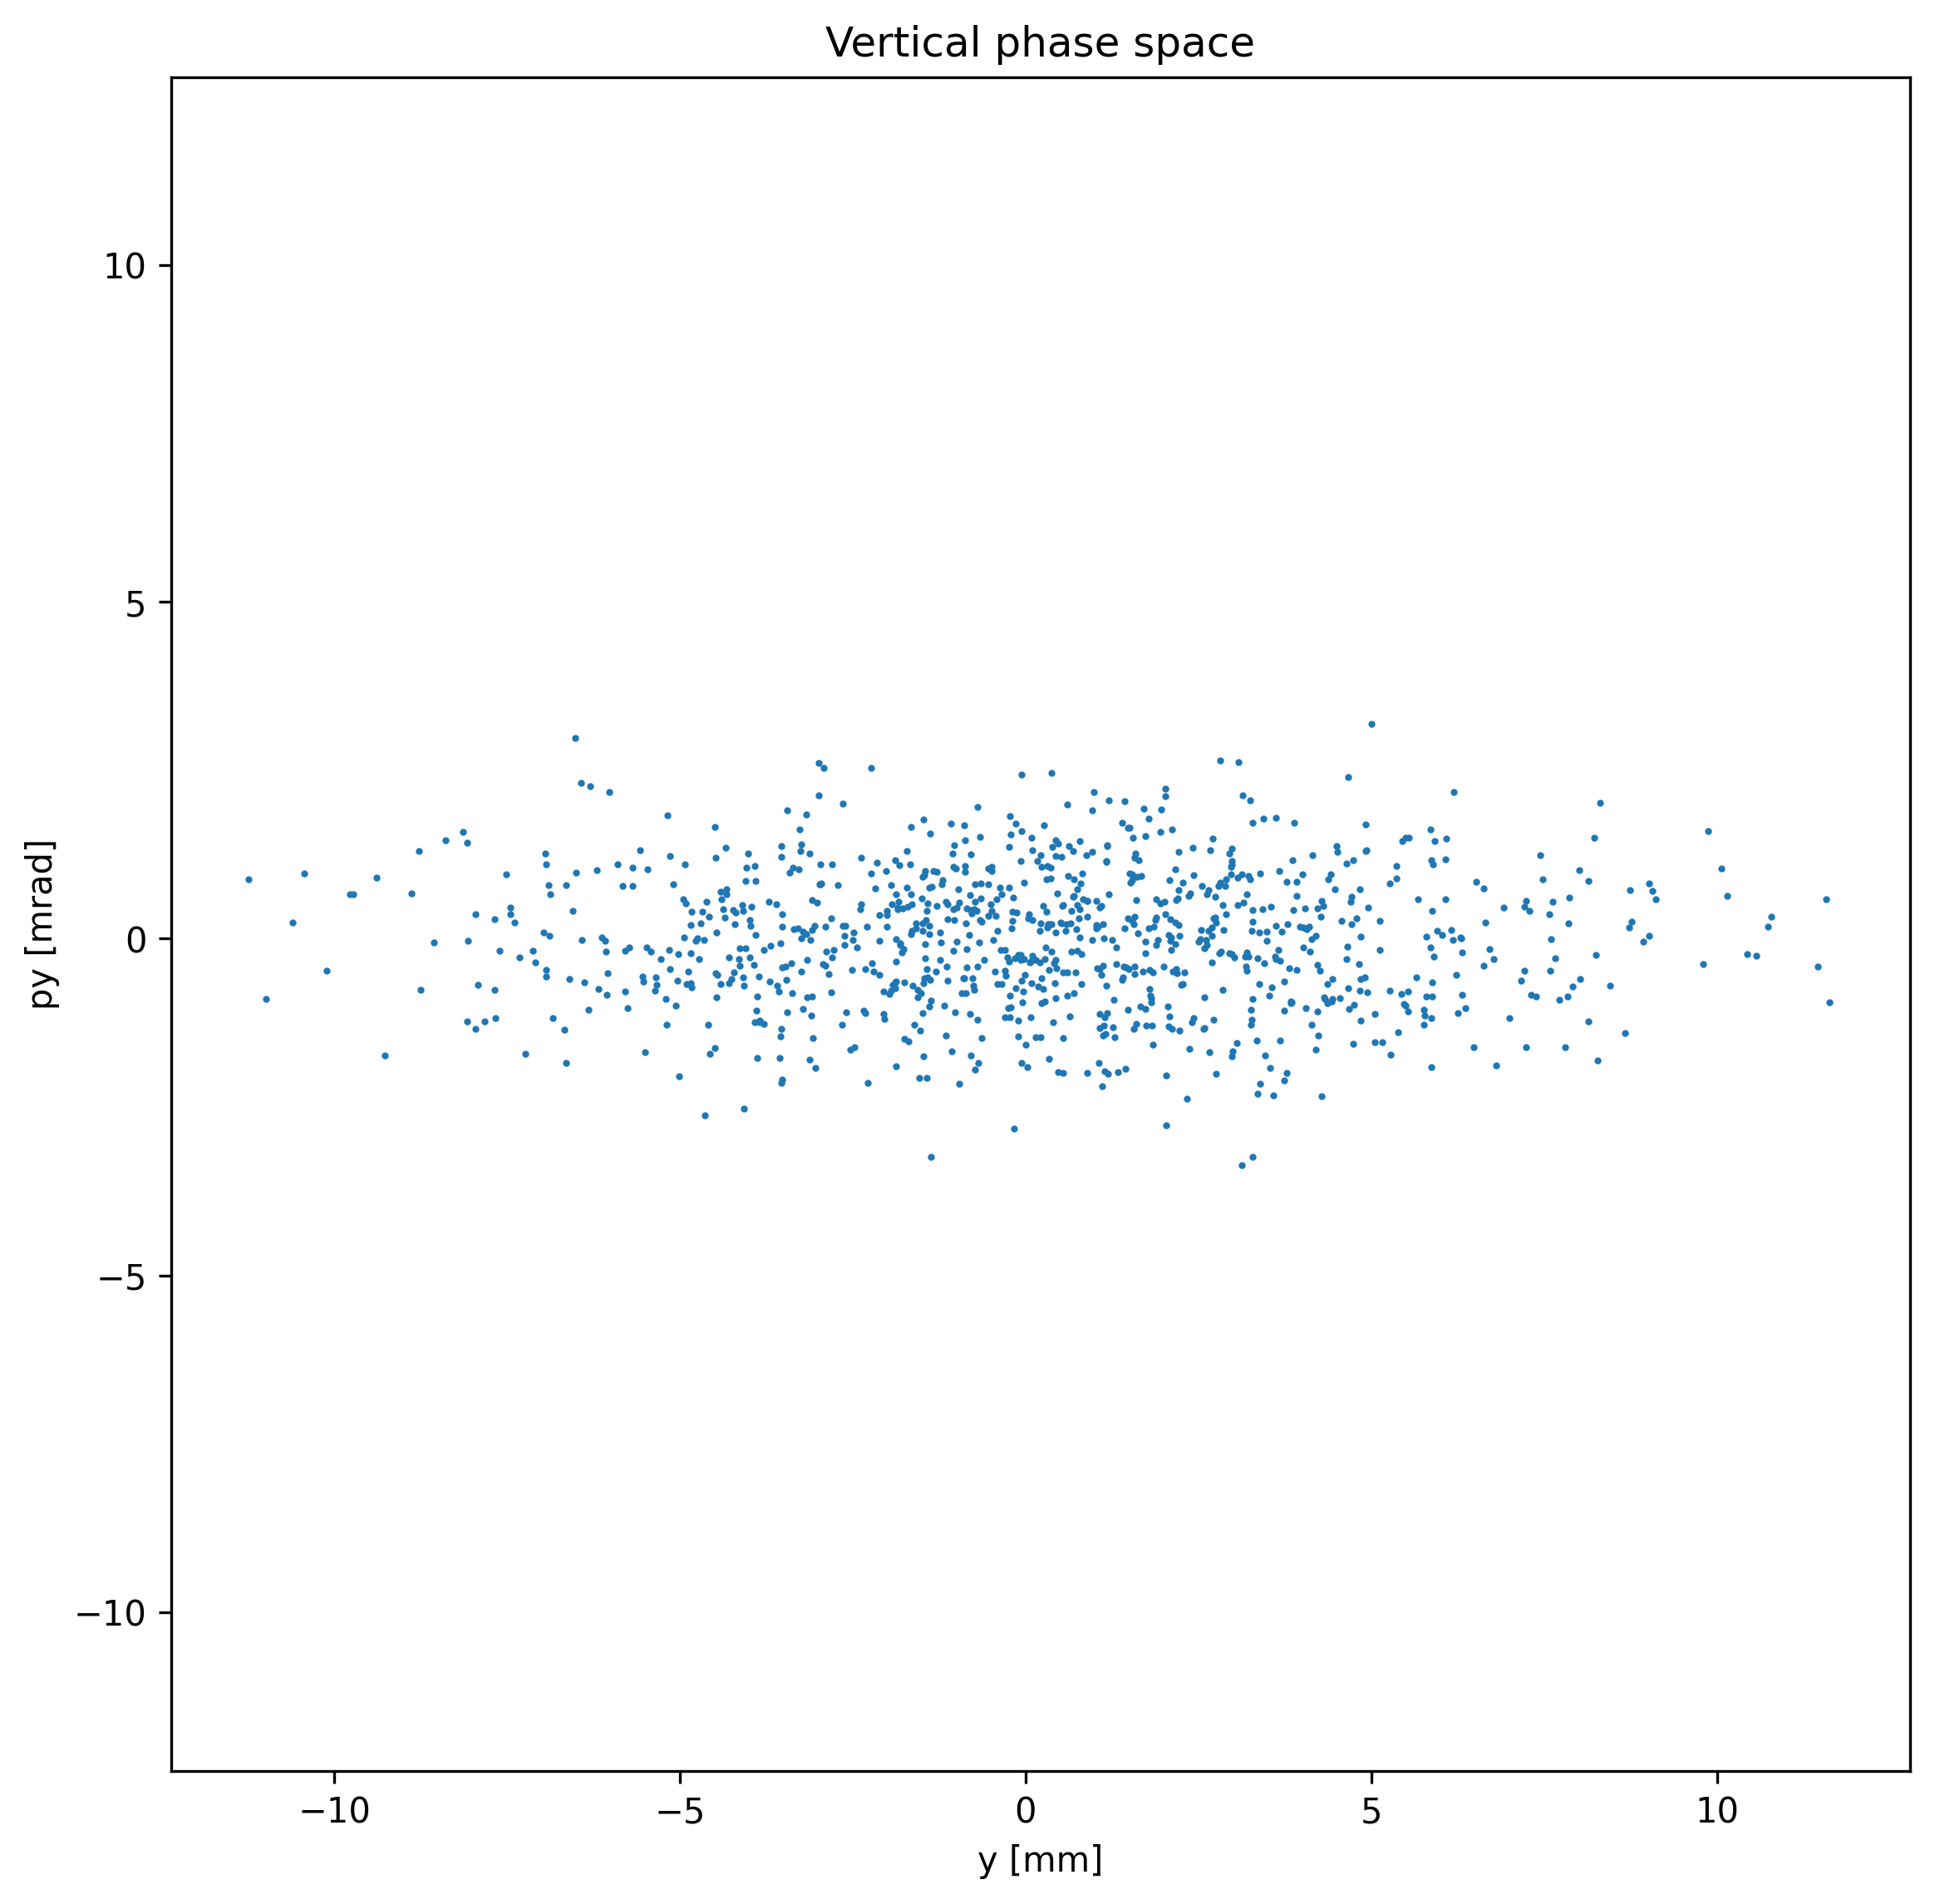

In [9]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Vertical phase space')

plot_phase_space(ax, bunch['y'], bunch["py"], "y [mm]", "py [mrad]")
plt.show()

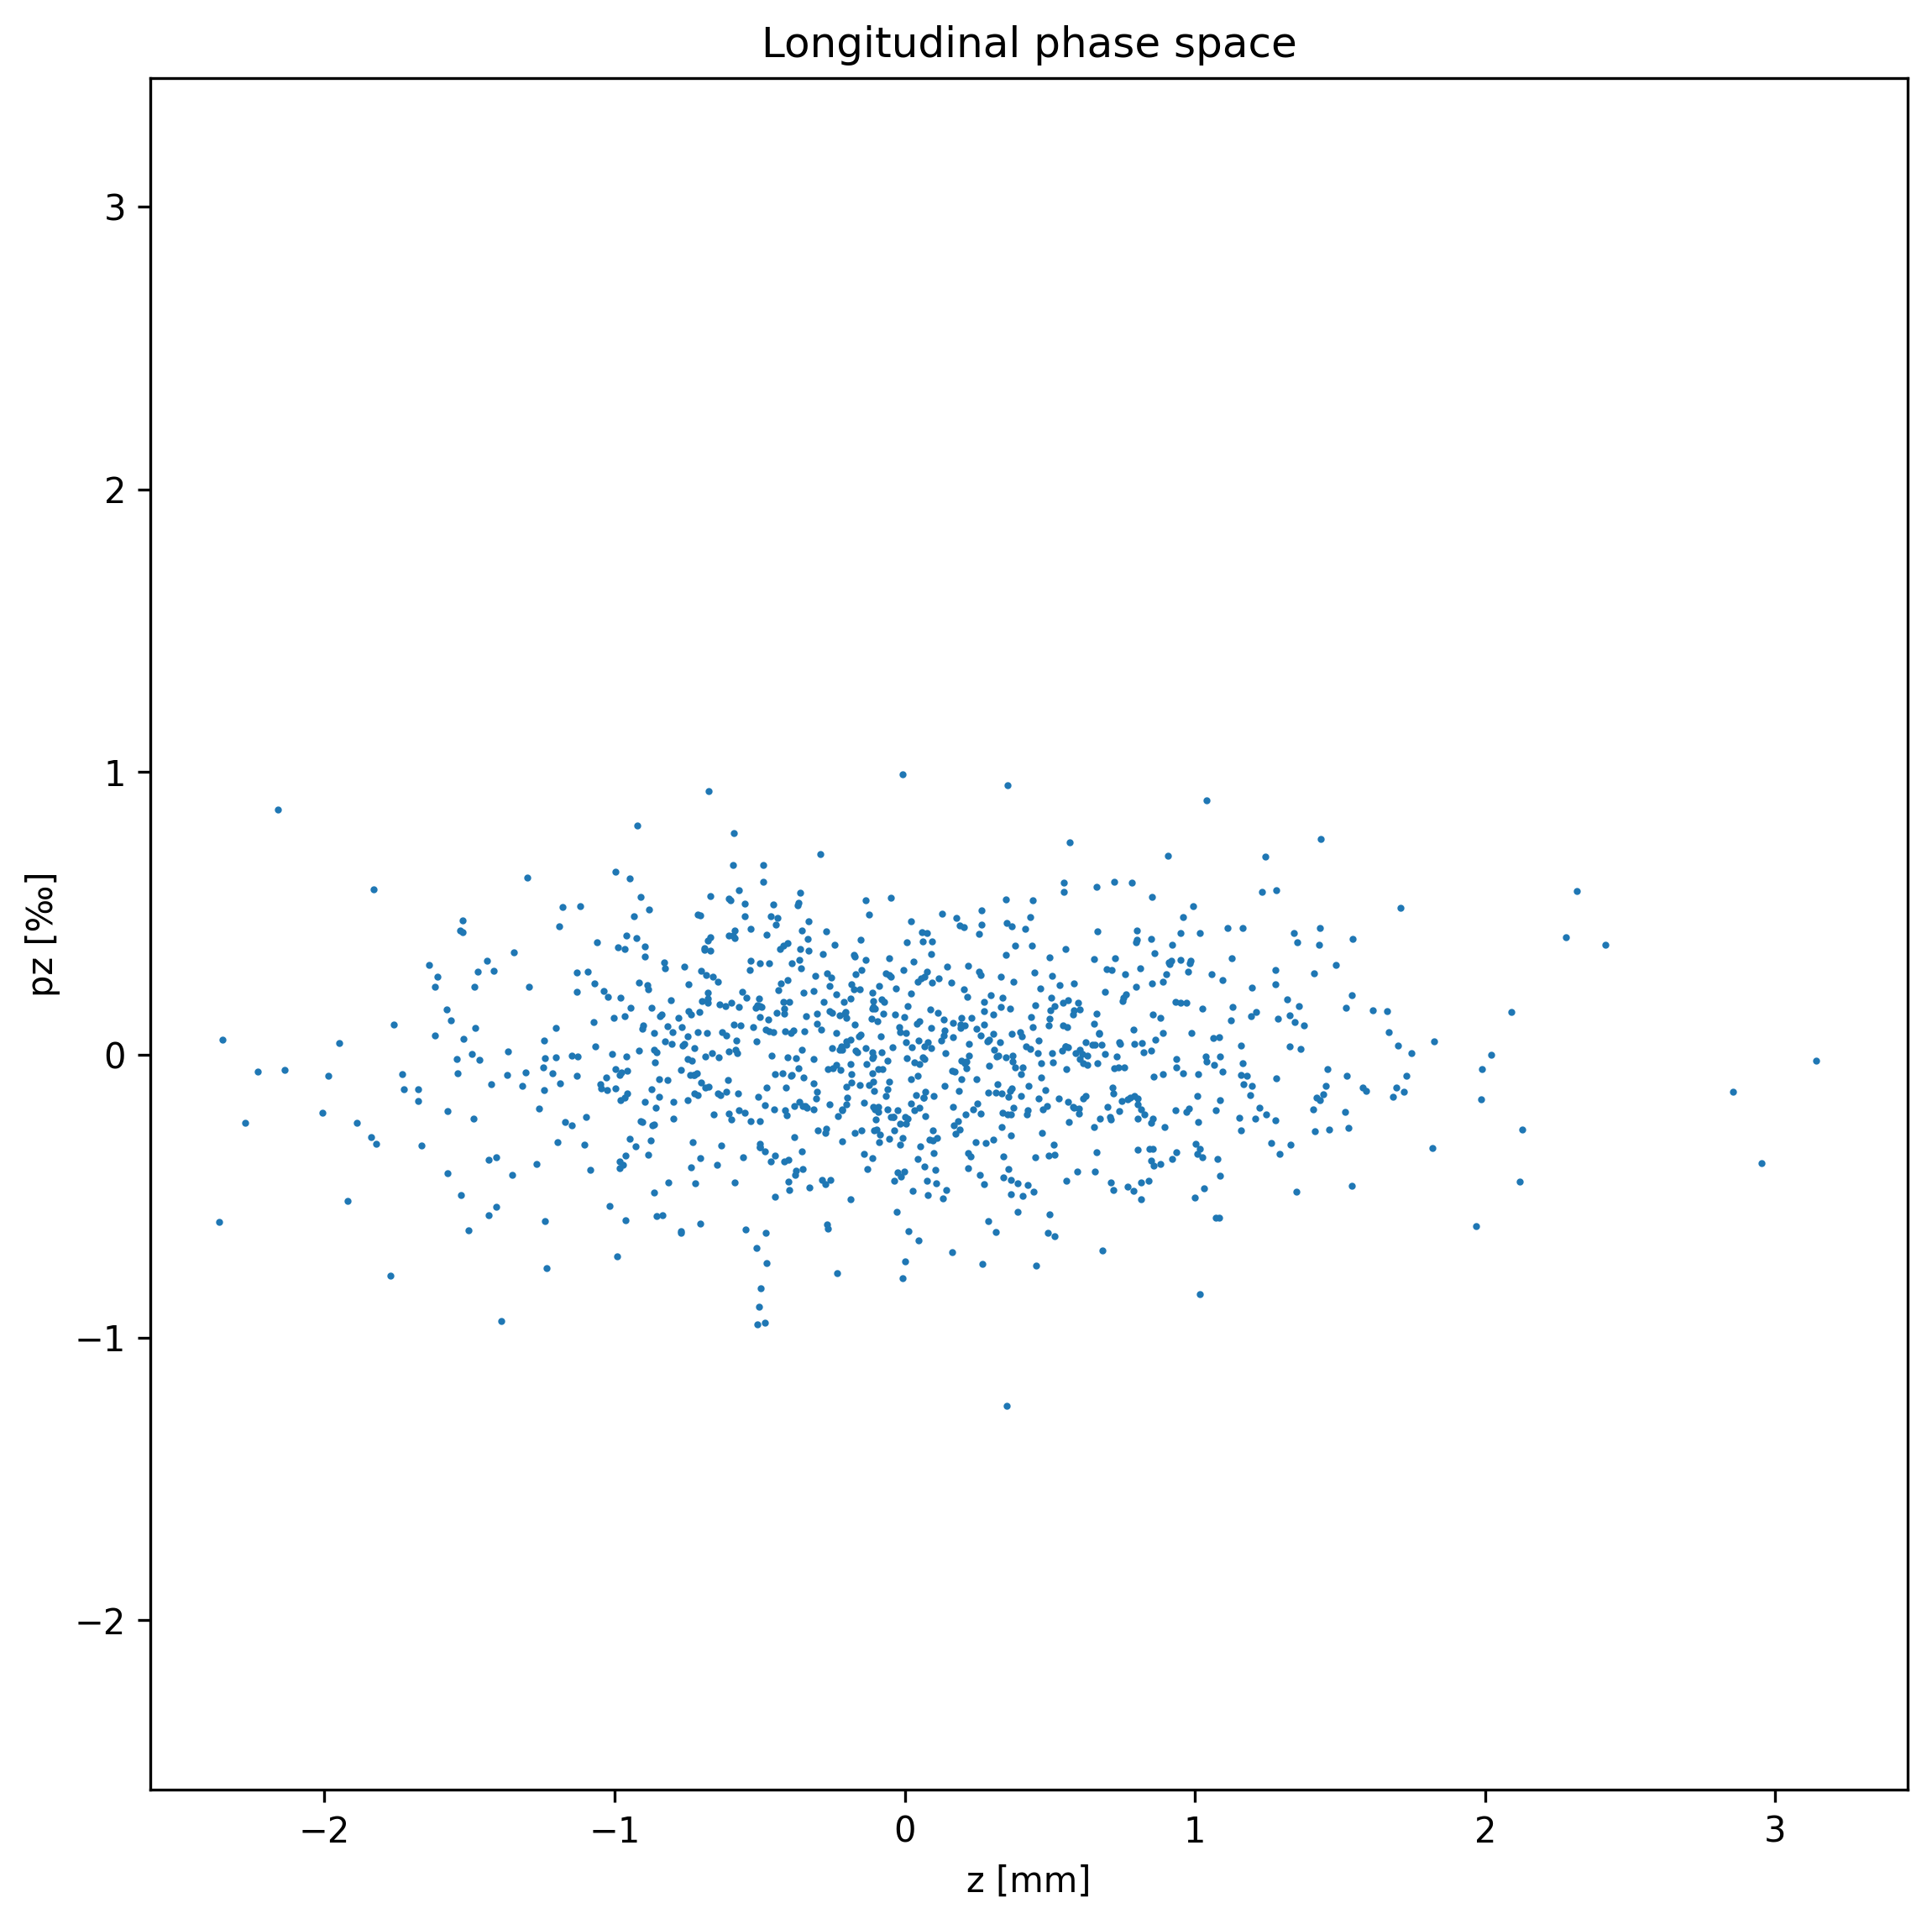

In [10]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Longitudinal phase space')

plot_phase_space(ax, bunch['z'], bunch["pz"], "z [mm]", "pz [\u2030]")
plt.show()

<html>
<div class="alert alert-info" role="alert" style="margin-top: 10px">
Play around: Try to define a Electron class and then create an electron bunch. Plot the phase space.
</div>
</html>